In [ ]:
!pip install yfinance

In [ ]:
import sys
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [ ]:
date.today()

datetime.date(2020, 12, 4)

In [ ]:
acciones=["CAP.SN","CCU.SN", "CENCOSUD.SN","SQM-A.SN"]

data  = yf.download(acciones, start="2015-01-01", end=date.today())  #con period=max agarro todo
data = data['Adj Close']

P = data.iloc[-1:].values #Guardar precios iniciales de las acciones
data.head()

[*********************100%***********************]  4 of 4 completed


,CAP.SN,CCU.SN,CENCOSUD.SN,SQM-A.SN
Date,,,,
2015-01-02,2351.930176,4956.494141,1368.781738,13790.05957
2015-01-05,2246.205566,4782.753418,1320.099243,13790.05957
2015-01-06,2218.423340,4842.867188,1319.183960,13790.05957
2015-01-07,2195.357422,4825.406738,1305.732422,13790.05957
2015-01-08,2256.494873,4896.900879,1289.992920,13790.05957


In [ ]:
ret_log = np.log(data/data.shift(1)) #Retornos logaritmicos
ret_log = ret_log.dropna()
ret_log.head()

,CAP.SN,CCU.SN,CENCOSUD.SN,SQM-A.SN
Date,,,,
2015-01-05,-0.045994,-0.035682,-0.036214,0.0
2015-01-06,-0.012446,0.012491,-0.000694,0.0
2015-01-07,-0.010452,-0.003612,-0.010249,0.0
2015-01-08,0.027468,0.014708,-0.012127,0.0
2015-01-09,0.010584,-0.011975,-0.000284,0.0


In [ ]:
M=ret_log.corr()
M

,CAP.SN,CCU.SN,CENCOSUD.SN,SQM-A.SN
CAP.SN,1.000000,0.214359,0.339472,0.177170
CCU.SN,0.214359,1.000000,0.379414,0.188858
CENCOSUD.SN,0.339472,0.379414,1.000000,0.185947
SQM-A.SN,0.177170,0.188858,0.185947,1.000000


In [ ]:
L=np.linalg.cholesky(M) #Descompocicion de cholesky
d=L @ np.transpose(L) #Corroberemos que se cumple

L 

array([[1.        , 0.        , 0.        , 0.        ],
       [0.21435932, 0.97675487, 0.        , 0.        ],
       [0.33947153, 0.31394301, 0.88667856, 0.        ],
       [0.17716974, 0.15447115, 0.08718779, 0.96806396]])

In [ ]:
mean=ret_log.mean().values
std=ret_log.std().values
print(mean)
np.exp(mean)



[ 7.75441616e-04  9.93002117e-05 -7.03169125e-07  4.12766589e-04]


array([1.00077574, 1.00009931, 0.9999993 , 1.00041285])

In [ ]:
n=1000 #número de simulaciones
n_dias=240 #días hábiles
delta_t=1
X={}
X_0=ret_log.iloc[-1:].values
#X=ret_log.iloc[-1:].values
#dia2=X[-1]+mean*delta_t+std*multivar[0]*(delta_t**(1/2))
for j in range(n):
  
  for i in range(n_dias):
    #if i==0:
      #X[i,j]=X_0[0] #no estoy seguro si el primer día se toma X_0
    #else:
    z=np.random.normal(0,1,4)
    mean_chol=0
    A=mean_chol + L@z
    X[i,j]=mean*delta_t+std*A*(delta_t**(1/2)) #revisar esta formula, se suma el día anterior?


In [ ]:
prom=0
for i in range(n_dias):
  for j in range(n):
    prom+=X[i,j]
prom=prom/n_dias/n
prom
np.exp(prom)

array([1.00078694, 1.00010345, 1.00005025, 1.00041128])

In [ ]:
mean

array([ 7.75441616e-04,  9.93002117e-05, -7.03169125e-07,  4.12766589e-04])

In [ ]:
series={}

for k in range(len(acciones)):
  for j in range(n):
    series[acciones[k],j]=[]
    for i in range(n_dias):
      series[acciones[k],j].append(X[i,j][k])
np.mean(series[acciones[3],100])

-0.0003617962528338447

In [ ]:
t=list(range(n_dias))

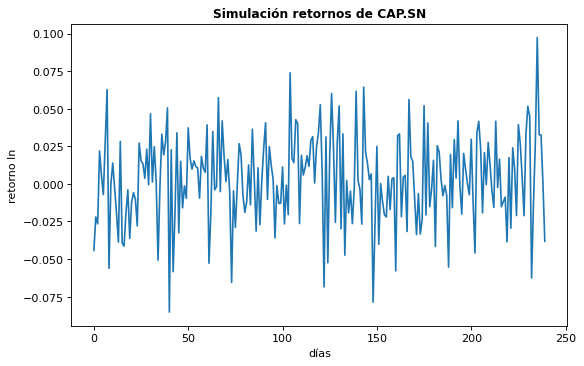

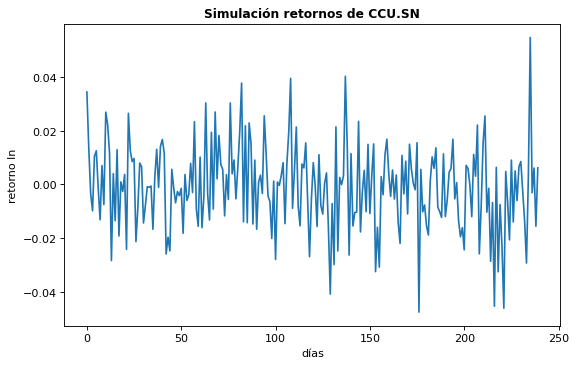

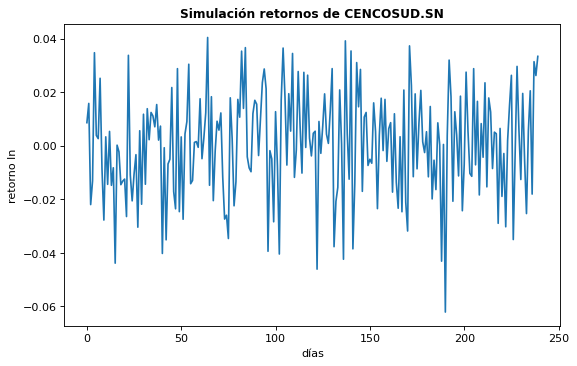

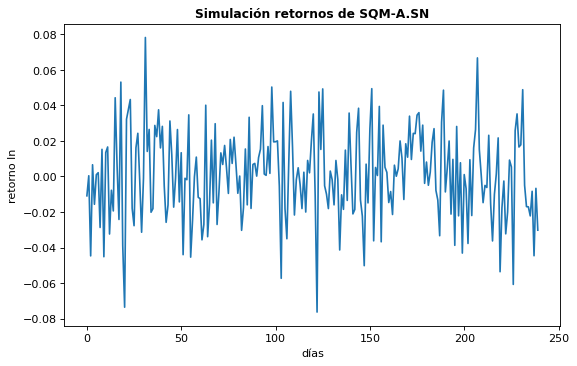

<Figure size 640x400 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
#for j in range(n):
#  plt.plot(t,series["CCU.SN",j])
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k') 
for i in acciones:
  plt.plot(t,series[i,5])
  plt.xlabel("días")
  plt.ylabel("retorno ln")
  plt.title("Simulación retornos de "+i,fontsize=11,fontweight="bold")
  plt.show()
  plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k') 
  

In [ ]:
from math import *
# PARTE 1

#Invertir 1/4 en cada accion
#Retornos a un año de k accion j-esima simulación

F1 = 1 #millones de pesos
ret1 = {}
for k in acciones:
  for j in range(n):
    for d in range(n_dias):
      ret1[k,j,d] =  exp(sum(series[k,j][0:d]))*F1/4 #irá con exponencial?
ret1

Inversion1={}
for j in range(n):
  Inversion1[j]=[]
  for d in range(n_dias):
    ganancia=0
    for k in acciones:
      ganancia+=ret1[k,j,d]
    Inversion1[j].append(ganancia)
  
#Riqueza al final

#std1 = np.std(Inversion1.values())
#np.std(list(Inversion1.values())) #?????
prom=0
for j in range(n):
  prom+=Inversion1[j][n_dias-1]
prom=prom/n
prom





1.1622487579461458

Text(0.5, 1.0, 'Trayectoria Individual Estrategia 1')

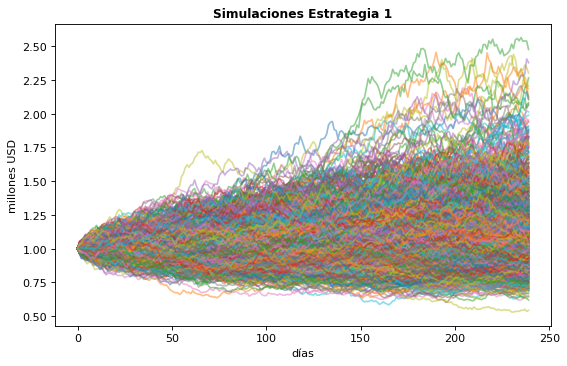

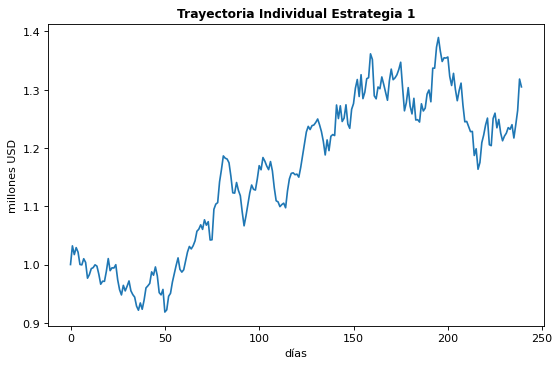

In [ ]:
#Ejemplo de Inversión
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')  
for j in range(n):
  plt.plot(t,Inversion1[j],alpha=0.5)
  plt.xlabel("días")
  plt.ylabel("millones USD")
  plt.title("Simulaciones Estrategia 1",fontsize=11,fontweight="bold")

plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')  
plt.plot(t,Inversion1[0])
plt.xlabel("días")
plt.ylabel("millones USD")
plt.title("Trayectoria Individual Estrategia 1",fontsize=11,fontweight="bold")

In [ ]:
# PARTE 2 cada mes vender y comprar un 1/4 en precios
ret2 = {}
F2 = 1
a=20 #días del mes hábil
     
#prueba 2
inv={} #plata que le metí a la acción

for j in range(n):
  for k in acciones:
    inv[k,j]=F1/4

monto_actual=0
for j in range(n):
  for i in range(n_dias):
    for k in acciones: 
      ret2[k,j,i]=exp(sum(series[k,j][0:i]))*inv[k,j] #con inv vemos la fracción invertida en ese período
    if i%20==19:
      monto_actual=0
      for k in acciones:
        inv[k,j]=exp(sum(series[k,j][a-20:a-1]))*inv[k,j]
        a+=20
        monto_actual=monto_actual+inv[k,j]
      for k in acciones:
        inv[k,j]=monto_actual/4



      #ret12[k,j] = sum(series[k,j][a-29:a])*F1/4
      #F1 = ret12[k,j]  


Inversion2={}
for j in range(n):
  Inversion2[j]=[]
  for i in range(n_dias):
    ganancia=0
    for k in acciones:
      ganancia+=ret2[k,j,i]
    Inversion2[j].append(ganancia)
  
#Riqueza al final

#std1 = np.std(Inversion1.values())
#np.std(list(Inversion1.values())) #?????
prom=0
for j in range(n):
  prom+=Inversion2[j][n_dias-1]
prom=prom/n
prom


1.1622534002577298

Text(0.5, 1.0, 'Trayectoria Individual Estrategia 2')

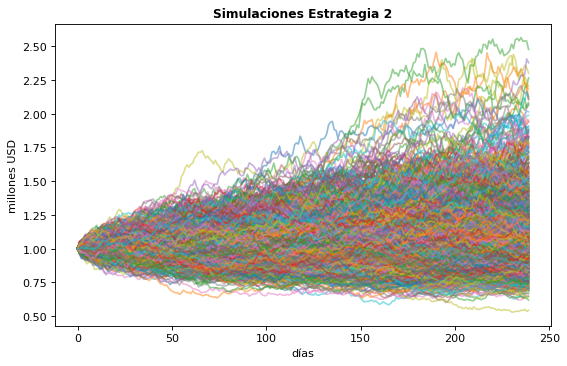

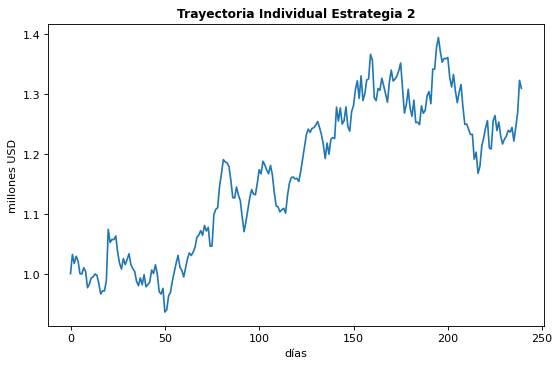

In [ ]:
#Ejemplo de Inversión 2
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
for j in range(n):
  plt.plot(t,Inversion2[j],alpha=0.5)
  plt.xlabel("días")
  plt.ylabel("millones USD")
  plt.title("Simulaciones Estrategia 2",fontsize=11,fontweight="bold")
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')  
plt.plot(t,Inversion2[0])
plt.xlabel("días")
plt.ylabel("millones USD")
plt.title("Trayectoria Individual Estrategia 2",fontsize=11,fontweight="bold")

In [ ]:
#PARTE 3
F3=1
inv3={} #monto ganado en cada acción
stop_investing={}
Inversion={}
for j in range(n):
  for k in acciones:
    inv3[k,j]=F3/4
    stop_investing[k,j]=False
    


ret3 = {}
for k in acciones:
  for j in range(n):
    for d in range(n_dias):
      if stop_investing[k,j]==False:
        if exp(sum(series[k,j][0:d]))*F3/4<F3*1.1/4:
          ret3[k,j,d] =  exp(sum(series[k,j][0:d]))*F3/4 
        else:
          ret3[k,j,d] =  exp(sum(series[k,j][0:d]))*F3/4 
          stop_investing[k,j]=True
      else:
        ret3[k,j,d]=ret3[k,j,d-1]+ret3[k,j,d-1]*0.02/n_dias

Inversion3={}
for j in range(n):
  Inversion3[j]=[]
  for i in range(n_dias):
    ganancia=0
    for k in acciones:
      ganancia+=ret3[k,j,i]
    Inversion3[j].append(ganancia)


prom=0
for j in range(n):
  prom+=Inversion3[j][n_dias-1]
prom=prom/n
prom

1.056980591408397

Text(0.5, 1.0, 'Trayectoria Individual Estrategia 3')

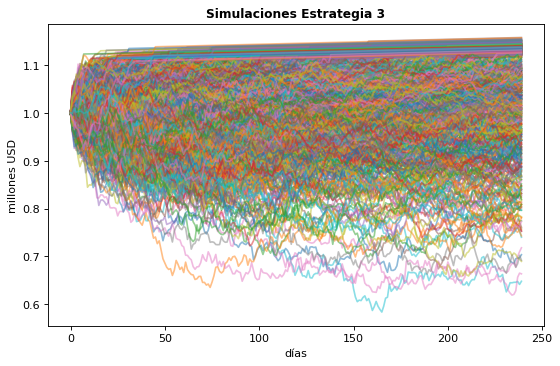

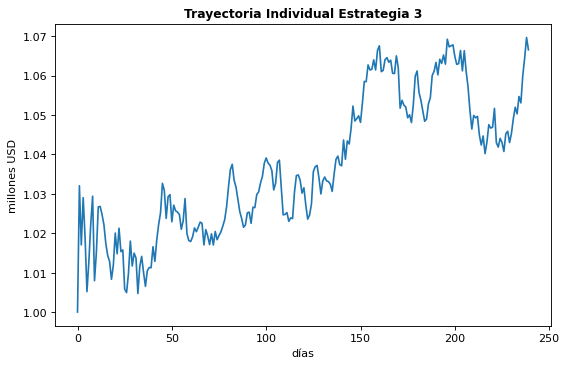

In [ ]:
#Ejemplo de Inversión 3
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k') 
for j in range(n):
  plt.plot(t,Inversion3[j],alpha=0.5)
  plt.xlabel("días")
  plt.ylabel("millones USD")
  plt.title("Simulaciones Estrategia 3",fontsize=11,fontweight="bold")
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')  
plt.plot(t,Inversion3[0])
plt.xlabel("días")
plt.ylabel("millones USD")
plt.title("Trayectoria Individual Estrategia 3",fontsize=11,fontweight="bold")

In [ ]:
#PARTE 4
F4=1
inv4={} #monto ganado en cada acción
stop_investing={}
Inversion={}
for j in range(n):
  stop_investing[j]=False
    


ret4 = {}

for j in range(n):
  for d in range(n_dias):
    if stop_investing[j]==False:
      if (exp(sum(series[acciones[0],j][0:d]))+exp(sum(series[acciones[1],j][0:d]))+exp(sum(series[acciones[2],j][0:d]))+exp(sum(series[acciones[3],j][0:d])))*F4/4<F4*1.15:
        for k in acciones:
          ret4[k,j,d] =  exp(sum(series[k,j][0:d]))*F4/4 
      else:
        for k in acciones:
          ret4[k,j,d] =  exp(sum(series[k,j][0:d]))*F4/4 
        stop_investing[j]=True
    else:
      for k in acciones:
        ret4[k,j,d]=ret4[k,j,d-1]+ret4[k,j,d-1]*0.02/n_dias

Inversion4={}
for j in range(n):
  Inversion4[j]=[]
  for i in range(n_dias):
    ganancia=0
    for k in acciones:
      ganancia+=ret4[k,j,i]
    Inversion4[j].append(ganancia)


prom=0
for j in range(n):
  prom+=Inversion4[j][n_dias-1]
prom=prom/n
prom

1.0881426984433529

Text(0.5, 1.0, 'Trayectoria Individual Estrategia 4')

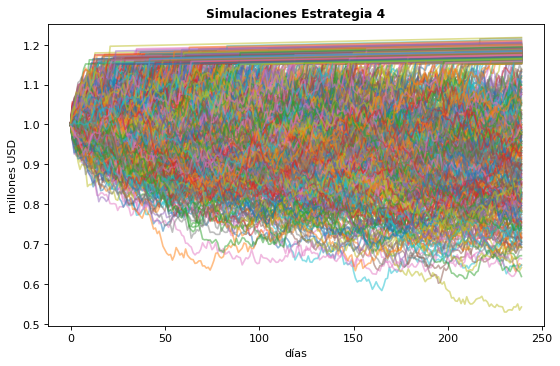

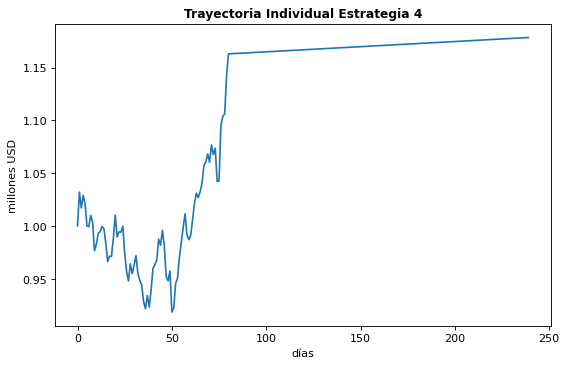

In [ ]:
#Ejemplo de Inversión 4
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')  
for j in range(n):
  plt.plot(t,Inversion4[j],alpha=0.5)
  plt.xlabel("días")
  plt.ylabel("millones USD")
  plt.title("Simulaciones Estrategia 4",fontsize=11,fontweight="bold")
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')  
plt.plot(t,Inversion4[0])
plt.xlabel("días")
plt.ylabel("millones USD")
plt.title("Trayectoria Individual Estrategia 4",fontsize=11,fontweight="bold")

In [ ]:
#valor esperado
Inversiones=[Inversion1,Inversion2,Inversion3,Inversion4]
day_data={} #aca veremos todos los escenarios de un dia
stats={} #todo lo que nos piden
for i in range(len(Inversiones)):
  for d in range(n_dias):
    day_data[i+1,d]=[]
    for j in range(n):
      day_data[i+1,d].append(Inversiones[i][j][d])
      if j==n-1:
        day_data[i+1,d].sort()
    stats[i+1,d,"esp"]=np.mean(day_data[i+1,d])
    stats[i+1,d,"std"]=np.std(day_data[i+1,d])
    stats[i+1,d,5]=np.percentile(day_data[i+1,d],5)
    stats[i+1,d,95]=np.percentile(day_data[i+1,d],95)

#ESTA ES LA IMPORTANTE
data_series={} #hacemos las series diarias de cada dato que nos piden
for i in range(len(Inversiones)):
  data_series[i+1,"esp"]=[]
  data_series[i+1,"std"]=[]
  data_series[i+1,"-std"]=[]
  data_series[i+1,5]=[]
  data_series[i+1,95]=[]
  for d in range(n_dias):
    data_series[i+1,"esp"].append(stats[i+1,d,"esp"])
    data_series[i+1,"std"].append(stats[i+1,d,"std"])
    #data_series[i+1,"std"].append(stats[i+1,d,"esp"]+stats[i+1,d,"std"])
    #data_series[i+1,"-std"].append(stats[i+1,d,"esp"]-stats[i+1,d,"std"])
    data_series[i+1,5].append(stats[i+1,d,5])
    data_series[i+1,95].append(stats[i+1,d,95])
  

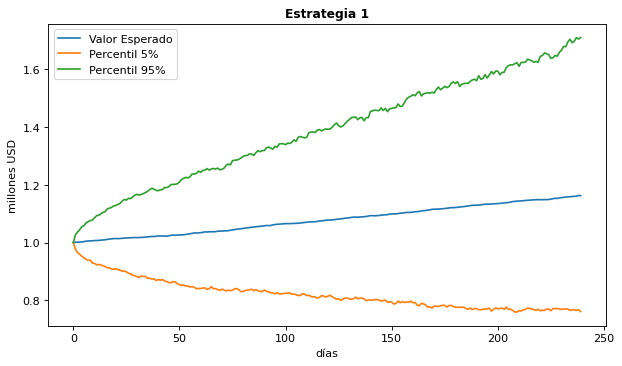

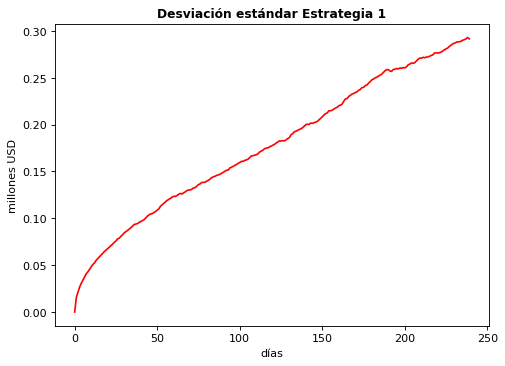

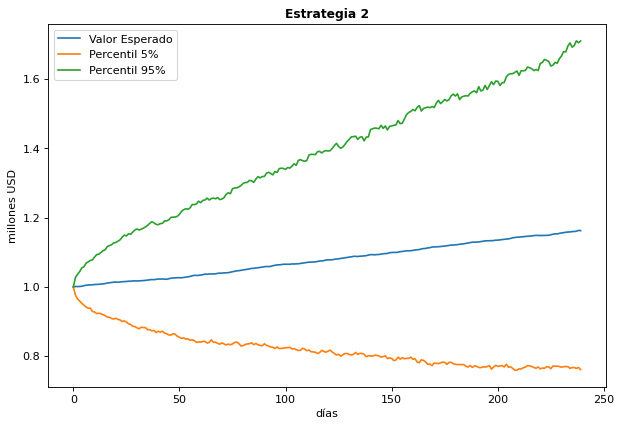

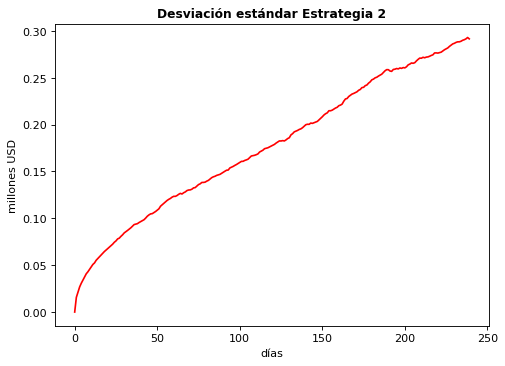

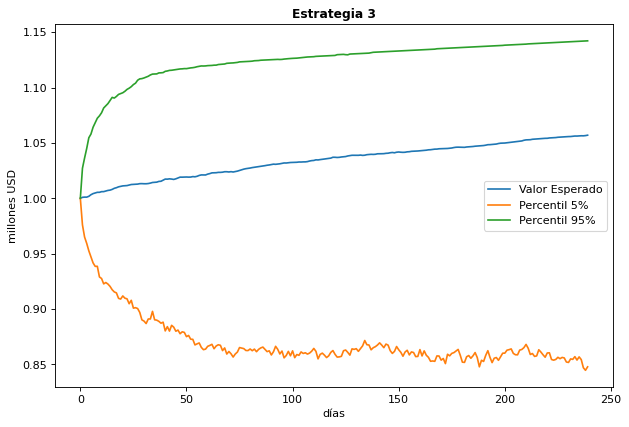

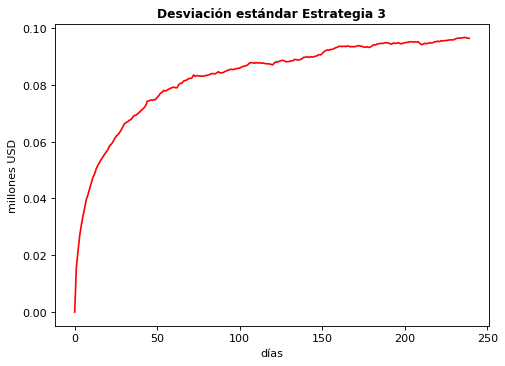

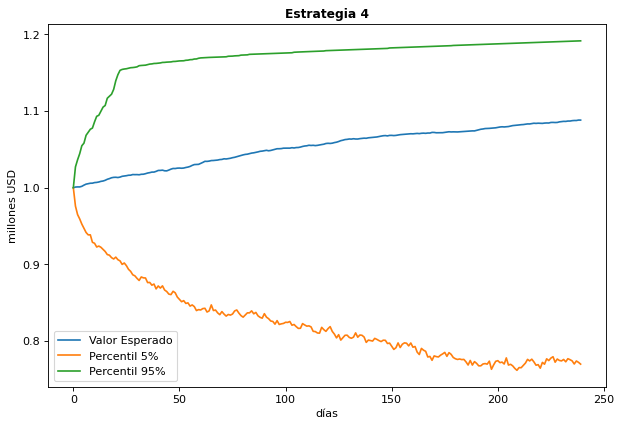

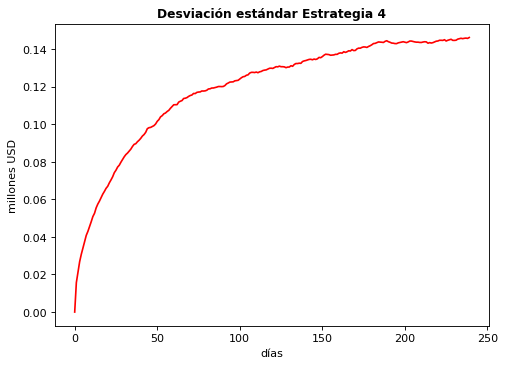

<Figure size 720x480 with 0 Axes>

In [ ]:
sts=[("esp","Valor Esperado"),(5,"Percentil 5%"),(95,"Percentil 95%")]
plt.figure(num=None, figsize=(9, 5), dpi=80, facecolor='w', edgecolor='k')   
for i in range(len(Inversiones)):
  for j in sts:
    plt.plot(t,data_series[i+1,j[0]],label=j[1])
    plt.xlabel("días")
    plt.ylabel("millones USD")
    plt.title("Estrategia "+str(i+1),fontsize=11,fontweight="bold")

    
  #plt.plot(t,data_series[i+1,"std"],label="+/- Desviación Estándar",color="grey",linestyle='dashed',linewidth=2)
  #plt.plot(t,data_series[i+1,"-std"],color="grey",linestyle='dashed',linewidth=2)
  plt.legend(loc='best')
  plt.show()
  plt.figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')  
  plt.plot(t,data_series[i+1,"std"],color="red")
  plt.xlabel("días")
  plt.ylabel("millones USD")
  plt.title("Desviación estándar Estrategia "+str(i+1),fontsize=11,fontweight="bold")
  plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')   